# Prediction of the persons likely to leave the bank

## Introduction

###### In this notebook we will build a multiple models to predict and who may stay and who may leave the bank ,This notebook is for the beginners who want to know some tools and models for doing a binary classification .
In this notebook, we will descover some models for Classification like Decision Tree ,KNN ,RandomForest ,Bagging ,Adaboost ,Adaboost+RandomForest ,Gredient Boosting and we will descover some Ensemble Of Ensembles Algorithms.And we will descover a technique named SearchGridCV for tuning our models and achieve the best Accuracy.

This is my first notebook to the public , In the next notebook I will present to you some Advanced Algorithms to doing Classification like Artificial Neural Networks and Improving the algorithms seen in this notebook with tuning.

I hope you will enjoy it.

## Importing the libraries and laod the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
color = sns.color_palette()
%matplotlib inline

In [3]:
dataset = pd.read_csv('C:/Users/HAKKACHE/Desktop/project/Churn_Modelling.csv')

In [3]:
dataset.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
dataset.shape

(10000, 14)

Our data conatians 10000 rows and 14 columns.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


 for the tree first columns "CustomerId","RowNumber","Surname" is not necessary for our project because this three features haven't any effect in our analysis ,then we must remove this three columns.

In [6]:
dataset.pop('RowNumber')
dataset.pop('CustomerId')
dataset.pop('Surname')

0             Hargrave
1                 Hill
2                 Onio
3                 Boni
4             Mitchell
5                  Chu
6             Bartlett
7               Obinna
8                   He
9                   H?
10              Bearce
11             Andrews
12                 Kay
13                Chin
14               Scott
15             Goforth
16               Romeo
17           Henderson
18             Muldrow
19                 Hao
20            McDonald
21            Dellucci
22           Gerasimov
23              Mosman
24                 Yen
25             Maclean
26               Young
27             Nebechi
28          McWilliams
29            Lucciano
             ...      
9970          Thompson
9971              Chou
9972             Ch'in
9973            Miller
9974            Barker
9975             Smith
9976           Azikiwe
9977           Mancini
9978             P'eng
9979            Diribe
9980              T'ao
9981          Burbidge
9982       

### Check the missing values

In this step we will create a function to check the missing values.

In [7]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [8]:
missing_data(dataset)

Total  Percent
Exited               0      0.0
EstimatedSalary      0      0.0
IsActiveMember       0      0.0
HasCrCard            0      0.0
NumOfProducts        0      0.0
Balance              0      0.0
Tenure               0      0.0
Age                  0      0.0
Gender               0      0.0
Geography            0      0.0
CreditScore          0      0.0

We haven't any missing value ,but bear in mind ,this step is crucial and data not always without missing values. we will see in the future notebook we will know some techniques to deal with the missing values.

## Exploratory Data Analysis

This step is crucial for discovering our data and knowing our variables ,then let's surf .

#### Let's check the balance of our classes

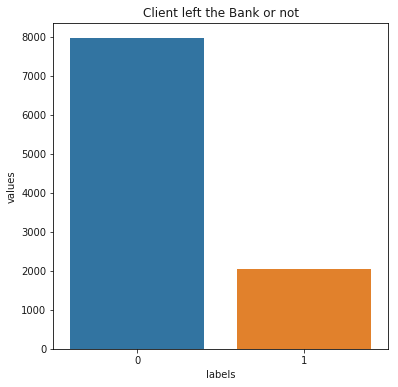

In [9]:
temp = dataset["Exited"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Client left the Bank or not')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

We can see clearly in this chart the classes are unbalanced and the persons who stayed with bank are near to 8000 but who left the bank are near to 2000 persons .

### Ditribution of Credit Score of our Clients

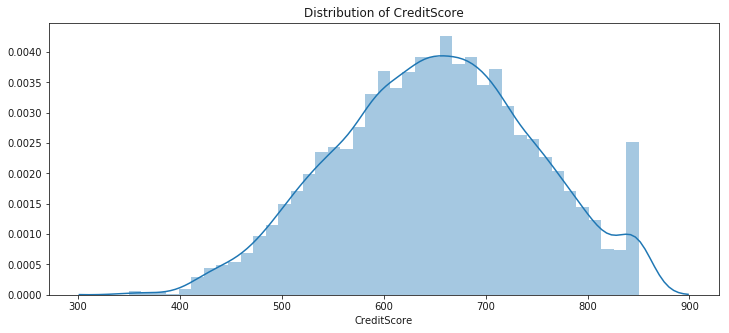

In [10]:
plt.figure(figsize=(12,5))
plt.title("Distribution of CreditScore")
ax = sns.distplot(dataset["CreditScore"])

### Distribution of Age 

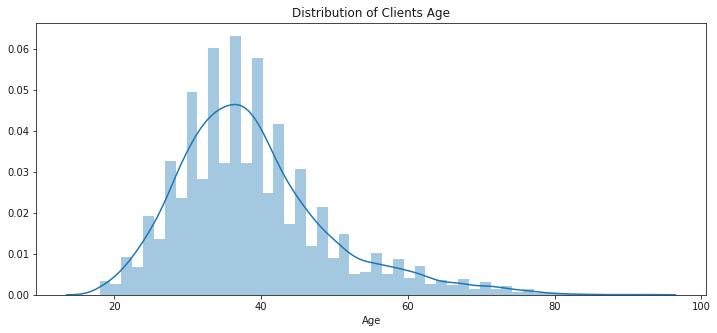

In [11]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Clients Age")
ax = sns.distplot(dataset["Age"])

### Distribution of Balance 

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Balance")
ax = sns.distplot(dataset["Balance"])

### Ditribution of Age of Estimated Salary

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Estimated Salary")
ax = sns.distplot(dataset["EstimatedSalary"])

Let's see the effect of others variables (Geography,Gender,NumOfProducts,HasCrCard, IsActiveMember ,Tenure) on a separate plot, with TARGET value 1 (left the bank).
we will create a function to doing this task.

In [14]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = dataset[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of Customers': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = dataset[[feature, 'Exited']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='Exited', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of Customers",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='Exited', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

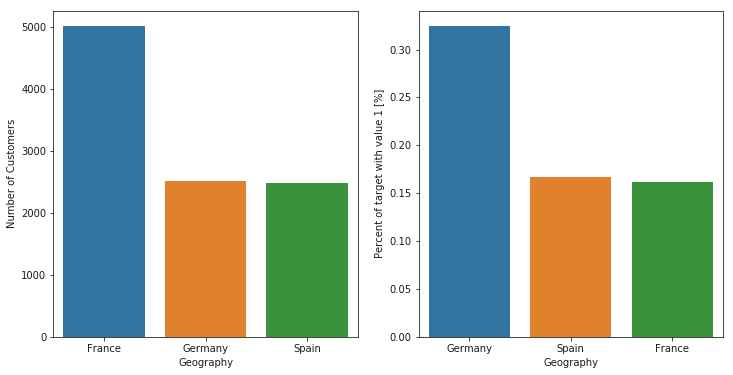

In [15]:
plot_stats("Geography")

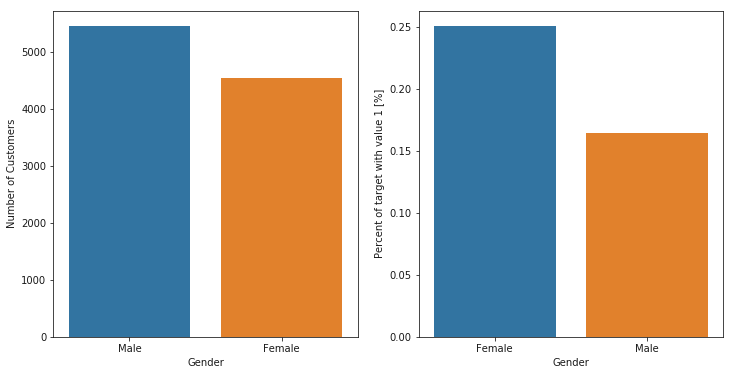

In [16]:
plot_stats("Gender")

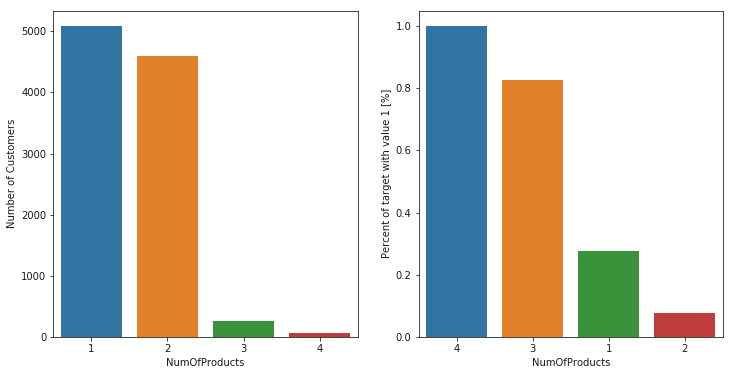

In [17]:
plot_stats("NumOfProducts")

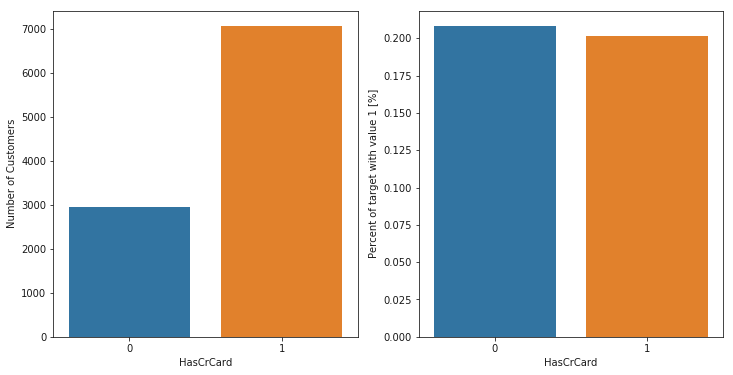

In [18]:
plot_stats("HasCrCard")

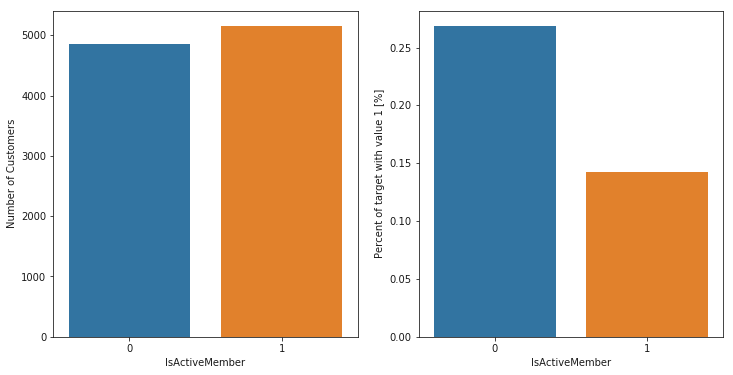

In [19]:
plot_stats("IsActiveMember")

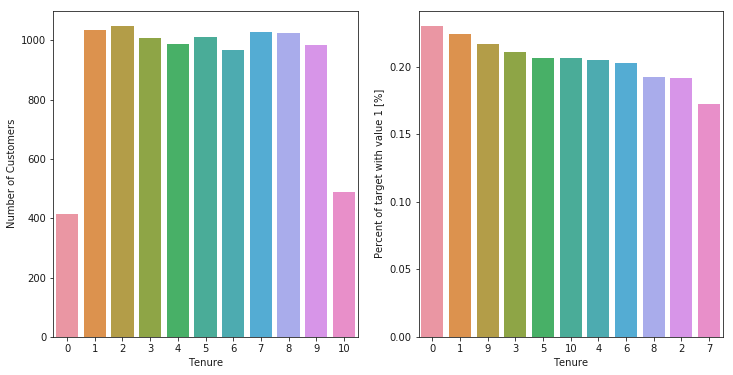

In [20]:
plot_stats("Tenure")

In [21]:
y=dataset['Exited']

In [22]:
X = dataset

In [23]:
X.pop('Exited')

0       1
1       0
2       1
3       0
4       0
5       1
6       0
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      1
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9970    0
9971    0
9972    0
9973    0
9974    0
9975    1
9976    0
9977    0
9978    0
9979    0
9980    0
9981    1
9982    1
9983    0
9984    0
9985    0
9986    0
9987    0
9988    0
9989    0
9990    0
9991    1
9992    0
9993    0
9994    0
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [24]:
y.unique()

array([1, 0], dtype=int64)

In [25]:
dataset.select_dtypes(['object'])

Geography  Gender
0       France  Female
1        Spain  Female
2       France  Female
3       France  Female
4        Spain  Female
5        Spain    Male
6       France    Male
7      Germany  Female
8       France    Male
9       France    Male
10      France    Male
11       Spain    Male
12      France  Female
13      France  Female
14       Spain  Female
15     Germany    Male
16     Germany    Male
17       Spain  Female
18       Spain    Male
19      France  Female
20      France    Male
21       Spain  Female
22       Spain  Female
23      France    Male
24      France  Female
25      France    Male
26     Germany    Male
27      France    Male
28     Germany  Female
29      France    Male
...        ...     ...
9970    France    Male
9971    France  Female
9972    France    Male
9973    France    Male
9974    France    Male
9975   Germany    Male
9976    France  Female
9977    France  Female
9978    France    Male
9979    France  Female
9980     Spain    Male
9981   Germany    Male
9982   Germany  Female
9983    France    Male
9984   Germany    Male
9985    France    Male
9986   Germany    Male
9987     Spain    Male
9988    France    Male
9989     Spain    Male
9990   Germany    Male
9991    France  Female
9992     Spain    Male
9993    France    Male
9994    France  Female
9995    France    Male
9996    France    Male
9997    France  Female
9998   Germany    Male
9999    France  Female

[10000 rows x 2 columns]

In [26]:
dataset.select_dtypes(['object'])

Geography  Gender
0       France  Female
1        Spain  Female
2       France  Female
3       France  Female
4        Spain  Female
5        Spain    Male
6       France    Male
7      Germany  Female
8       France    Male
9       France    Male
10      France    Male
11       Spain    Male
12      France  Female
13      France  Female
14       Spain  Female
15     Germany    Male
16     Germany    Male
17       Spain  Female
18       Spain    Male
19      France  Female
20      France    Male
21       Spain  Female
22       Spain  Female
23      France    Male
24      France  Female
25      France    Male
26     Germany    Male
27      France    Male
28     Germany  Female
29      France    Male
...        ...     ...
9970    France    Male
9971    France  Female
9972    France    Male
9973    France    Male
9974    France    Male
9975   Germany    Male
9976    France  Female
9977    France  Female
9978    France    Male
9979    France  Female
9980     Spain    Male
9981   Germany    Male
9982   Germany  Female
9983    France    Male
9984   Germany    Male
9985    France    Male
9986   Germany    Male
9987     Spain    Male
9988    France    Male
9989     Spain    Male
9990   Germany    Male
9991    France  Female
9992     Spain    Male
9993    France    Male
9994    France  Female
9995    France    Male
9996    France    Male
9997    France  Female
9998   Germany    Male
9999    France  Female

[10000 rows x 2 columns]

In [27]:
ind_Geography =pd.get_dummies(dataset['Geography'] ,prefix = 'Geography')
ind_Gender =pd.get_dummies(dataset['Gender'] ,prefix = 'Gender')

In [28]:
ind_Geography.head()

Geography_France  Geography_Germany  Geography_Spain
0                 1                  0                0
1                 0                  0                1
2                 1                  0                0
3                 1                  0                0
4                 0                  0                1

In [29]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [30]:
dataset1 = pd.concat([ind_Geography, ind_Gender ])

In [31]:
dataset.select_dtypes(['int64'])

CreditScore  Age  Tenure  NumOfProducts  HasCrCard  IsActiveMember
0             619   42       2              1          1               1
1             608   41       1              1          0               1
2             502   42       8              3          1               0
3             699   39       1              2          0               0
4             850   43       2              1          1               1
5             645   44       8              2          1               0
6             822   50       7              2          1               1
7             376   29       4              4          1               0
8             501   44       4              2          0               1
9             684   27       2              1          1               1
10            528   31       6              2          0               0
11            497   24       3              2          1               0
12            476   34      10              2          1               0
13            549   25       5              2          0               0
14            635   35       7              2          1               1
15            616   45       3              2          0               1
16            653   58       1              1          1               0
17            549   24       9              2          1               1
18            587   45       6              1          0               0
19            726   24       6              2          1               1
20            732   41       8              2          1               1
21            636   32       8              2          1               0
22            510   38       4              1          1               0
23            669   46       3              2          0               1
24            846   38       5              1          1               1
25            577   25       3              2          0               1
26            756   36       2              1          1               1
27            571   44       9              2          0               0
28            574   43       3              1          1               1
29            411   29       0              2          1               1
...           ...  ...     ...            ...        ...             ...
9970          518   42       7              2          1               0
9971          833   34       3              1          0               0
9972          758   26       4              1          1               0
9973          611   27       7              2          1               1
9974          583   33       7              1          1               0
9975          610   50       1              2          1               0
9976          637   33       7              1          1               0
9977          683   32       9              2          1               1
9978          774   40       9              2          1               0
9979          677   58       1              1          0               1
9980          741   35       6              1          0               0
9981          498   42       3              1          1               1
9982          655   46       7              1          1               0
9983          613   40       4              1          0               0
9984          602   35       7              2          1               1
9985          659   36       6              2          1               0
9986          673   47       1              2          0               1
9987          606   30       8              2          1               1
9988          775   30       4              2          1               0
9989          841   28       4              2          1               1
9990          714   33       3              1          1               0
9991          597   53       4              1          1               0
9992          726   36       2              1          1        

In [32]:
dataset1 = pd.concat([ind_Geography, ind_Gender ,dataset.select_dtypes(['int64'])], axis =1)

In [33]:
dataset1.shape

(10000, 11)

In [34]:
dataset1.head()

Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                 1                  0                0              1   
1                 0                  0                1              1   
2                 1                  0                0              1   
3                 1                  0                0              1   
4                 0                  0                1              1   

   Gender_Male  CreditScore  Age  Tenure  NumOfProducts  HasCrCard  \
0            0          619   42       2              1          1   
1            0          608   41       1              1          0   
2            0          502   42       8              3          1   
3            0          699   39       1              2          0   
4            0          850   43       2              1          1   

   IsActiveMember  
0               1  
1               1  
2               0  
3               0  
4               1

## Modelling and evaluating the model

In [35]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train  ,y_test =train_test_split(dataset1 ,y)

In [36]:
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix

In [37]:
from sklearn.model_selection import cross_val_score ,cross_val_predict
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("\n Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))   
        res = cross_val_score(clf, X_test, y_test.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        

### Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
clf =DecisionTreeClassifier(random_state=42)

In [40]:
clf.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [41]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      5972
          1       1.00      1.00      1.00      1528

avg / total       1.00      1.00      1.00      7500


Confusion Matrix: 
 [[5972    0]
 [   2 1526]]

Average Accuracy: 	 0.7801
Accuracy SD: 		 0.0138

 Test Result:

accuracy score: 0.7844

Classification Report: 
              precision    recall  f1-score   support

          0       0.87      0.86      0.86      1991
          1       0.47      0.49      0.48       509

avg / total       0.79      0.78      0.79      2500


Confusion Matrix: 
 [[1711  280]
 [ 259  250]]

Average Accuracy: 	 0.7724
Accuracy SD: 		 0.0252


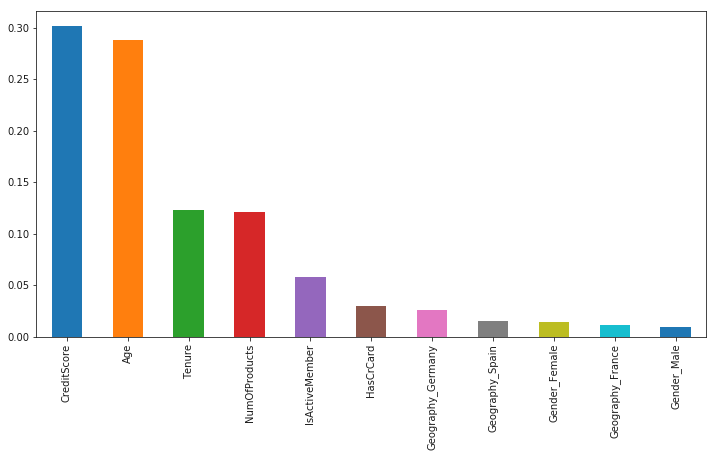

In [42]:
pd.Series(clf.feature_importances_,
         index = X_train.columns).sort_values(ascending= False).plot(kind ='bar' , figsize=(12,6));

### Tuning the Decision Tree with SearchGridCV

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [45]:
params ={'min_samples_split' :[36 ,38 , 40 ,42 , 44],
         'criterion' :['gini','entropy'],
         }

In [46]:
grid_search_cv =GridSearchCV(DecisionTreeClassifier(),
                            params,n_jobs=-1,verbose=1)

In [47]:
grid_search_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [36, 38, 40, 42, 44], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [48]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=44,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=True)
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8788

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.97      0.93      5972
          1       0.80      0.54      0.65      1528

avg / total       0.87      0.88      0.87      7500


Confusion Matrix: 
 [[5764  208]
 [ 701  827]]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.5s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.3s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.2s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.1s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.5s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.5s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.4s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.3s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.2s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.4s finished


Average Accuracy: 	 0.8404
Accuracy SD: 		 0.0131

 Test Result:

accuracy score: 0.8476

Classification Report: 
              precision    recall  f1-score   support

          0       0.87      0.95      0.91      1991
          1       0.69      0.46      0.55       509

avg / total       0.84      0.85      0.84      2500


Confusion Matrix: 
 [[1883  108]
 [ 273  236]]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.0s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.9s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.9s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.9s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.0s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.1s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.9s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.9s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.2s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.0s finished


Average Accuracy: 	 0.8408
Accuracy SD: 		 0.0192


## Bagging

In [50]:
from sklearn.ensemble import BaggingClassifier

In [51]:
bag_clf = BaggingClassifier(base_estimator=clf ,n_estimators=5000 ,
                           bootstrap =True ,n_jobs=-1 , random_state=42)

In [52]:
bag_clf.fit(X_train ,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [53]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      5972
          1       1.00      1.00      1.00      1528

avg / total       1.00      1.00      1.00      7500


Confusion Matrix: 
 [[5972    0]
 [   2 1526]]

Average Accuracy: 	 0.8436
Accuracy SD: 		 0.0086

 Test Result:

accuracy score: 0.8436

Classification Report: 
              precision    recall  f1-score   support

          0       0.88      0.93      0.90      1991
          1       0.65      0.49      0.56       509

avg / total       0.83      0.84      0.84      2500


Confusion Matrix: 
 [[1858  133]
 [ 258  251]]

Average Accuracy: 	 0.8376
Accuracy SD: 		 0.0222


## KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier (n_neighbors =5,p=2 ,metric ='minkowski')

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8465

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.96      0.91      5972
          1       0.71      0.42      0.52      1528

avg / total       0.83      0.85      0.83      7500


Confusion Matrix: 
 [[5713  259]
 [ 892  636]]

Average Accuracy: 	 0.7873
Accuracy SD: 		 0.0080

 Test Result:

accuracy score: 0.7924

Classification Report: 
              precision    recall  f1-score   support

          0       0.83      0.92      0.88      1991
          1       0.48      0.28      0.35       509

avg / total       0.76      0.79      0.77      2500


Confusion Matrix: 
 [[1840  151]
 [ 368  141]]

Average Accuracy: 	 0.7708
Accuracy SD: 		 0.0259


### Tuning the KNN with SearchGridCV

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [60]:
params ={'n_neighbors':[4,6,7,8,9],
        'p':[2,3,4,5,6,]}

In [61]:
grid_search_cv =GridSearchCV(KNeighborsClassifier(),
                            params,n_jobs=-1,verbose=1)

In [62]:
grid_search_cv.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   27.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [4, 6, 7, 8, 9], 'p': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [63]:
grid_search_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [64]:
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=True)
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8265

Classification Report: 
              precision    recall  f1-score   support

          0       0.85      0.96      0.90      5972
          1       0.65      0.32      0.43      1528

avg / total       0.81      0.83      0.80      7500


Confusion Matrix: 
 [[5711  261]
 [1040  488]]

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   26.6s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   25.7s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   24.4s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   26.8s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   26.1s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   25.2s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   25.6s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   23.7s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   23.3s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   24.1s finished


Average Accuracy: 	 0.7953
Accuracy SD: 		 0.0112

 Test Result:

accuracy score: 0.7948

Classification Report: 
              precision    recall  f1-score   support

          0       0.83      0.93      0.88      1991
          1       0.49      0.25      0.33       509

avg / total       0.76      0.79      0.77      2500


Confusion Matrix: 
 [[1860  131]
 [ 382  127]]

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.9s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   15.6s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   18.4s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   15.0s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   15.0s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.8s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.4s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.5s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   15.0s finished


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.5s


Average Accuracy: 	 0.7772
Accuracy SD: 		 0.0151


[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.7s finished


## RandomForest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_clf = RandomForestClassifier()

In [67]:
rf_clf.fit(X_train ,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9853

Classification Report: 
              precision    recall  f1-score   support

          0       0.98      1.00      0.99      5972
          1       1.00      0.93      0.96      1528

avg / total       0.99      0.99      0.99      7500


Confusion Matrix: 
 [[5968    4]
 [ 106 1422]]

Average Accuracy: 	 0.8377
Accuracy SD: 		 0.0089

 Test Result:

accuracy score: 0.8392

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.95      0.90      1991
          1       0.67      0.42      0.52       509

avg / total       0.82      0.84      0.82      2500


Confusion Matrix: 
 [[1884  107]
 [ 295  214]]

Average Accuracy: 	 0.8340
Accuracy SD: 		 0.0085


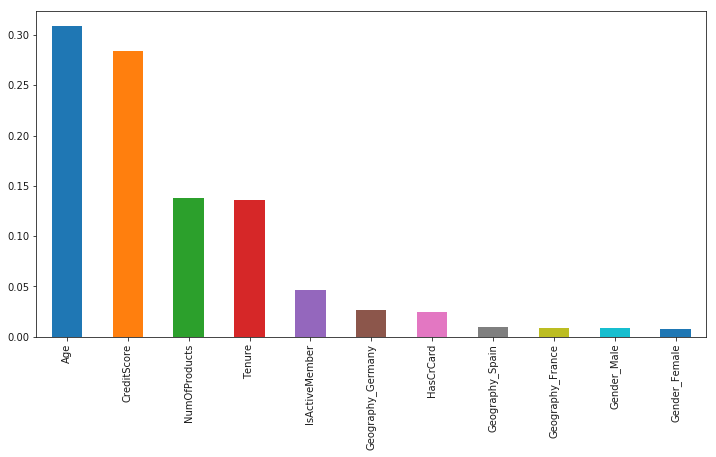

In [69]:
pd.Series(rf_clf.feature_importances_,
         index = X_train.columns).sort_values(ascending= False).plot(kind = 'bar',figsize = (12,6));

### AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
ada =AdaBoostClassifier()

In [72]:
ada_clf =ada.fit(X_train ,y_train)

In [73]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8596

Classification Report: 
              precision    recall  f1-score   support

          0       0.88      0.96      0.92      5972
          1       0.74      0.48      0.58      1528

avg / total       0.85      0.86      0.85      7500


Confusion Matrix: 
 [[5715  257]
 [ 796  732]]

Average Accuracy: 	 0.8553
Accuracy SD: 		 0.0099

 Test Result:

accuracy score: 0.8508

Classification Report: 
              precision    recall  f1-score   support

          0       0.87      0.95      0.91      1991
          1       0.71      0.46      0.55       509

avg / total       0.84      0.85      0.84      2500


Confusion Matrix: 
 [[1895   96]
 [ 277  232]]

Average Accuracy: 	 0.8492
Accuracy SD: 		 0.0180


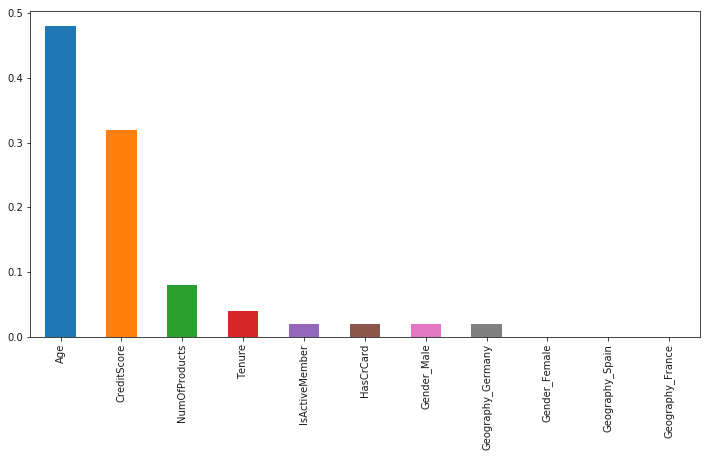

In [74]:
pd.Series(ada_clf.feature_importances_,
         index = X_train.columns).sort_values(ascending= False).plot(kind ='bar' , figsize=(12,6));

## Ada+RandomForest

In [75]:
ada_rf_clf =AdaBoostClassifier(RandomForestClassifier())
ada_rf_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [76]:
print_score(ada_rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      5972
          1       1.00      1.00      1.00      1528

avg / total       1.00      1.00      1.00      7500


Confusion Matrix: 
 [[5972    0]
 [   2 1526]]

Average Accuracy: 	 0.8223
Accuracy SD: 		 0.0124

 Test Result:

accuracy score: 0.8236

Classification Report: 
              precision    recall  f1-score   support

          0       0.87      0.92      0.89      1991
          1       0.59      0.44      0.51       509

avg / total       0.81      0.82      0.81      2500


Confusion Matrix: 
 [[1833  158]
 [ 283  226]]

Average Accuracy: 	 0.8064
Accuracy SD: 		 0.0142


## Gredient Boosting Classifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
gbc_clf =GradientBoostingClassifier()

In [79]:
gbc_clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [80]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8688

Classification Report: 
              precision    recall  f1-score   support

          0       0.88      0.97      0.92      5972
          1       0.80      0.48      0.60      1528

avg / total       0.86      0.87      0.86      7500


Confusion Matrix: 
 [[5783  189]
 [ 795  733]]

Average Accuracy: 	 0.8616
Accuracy SD: 		 0.0094

 Test Result:

accuracy score: 0.8596

Classification Report: 
              precision    recall  f1-score   support

          0       0.87      0.96      0.92      1991
          1       0.75      0.46      0.57       509

avg / total       0.85      0.86      0.85      2500


Confusion Matrix: 
 [[1914   77]
 [ 274  235]]

Average Accuracy: 	 0.8552
Accuracy SD: 		 0.0205
